# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
from IPython.display import display
# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [2]:
# check that you have version 0.9.13 of the pyrsm package
# install in a terminal using: pip install --user "pyrsm>=0.9.13"
rsm.__version__

'0.9.13'

In [3]:
# loading data tz_gaming.parquet
tz_gaming = pd.read_parquet('data/tz_gaming.parquet')


In [4]:
tz_gaming['training'].value_counts()

training
train    87535
test     27953
Name: count, dtype: int64

> Note: Review the data description carefully and watch the "Video: TZ gaming preview (12 min)" linked on Canvas

> Note: Full question details are contained in the tz-gaming-msba.pdf file


## Part I: Logistic regression (10 points)

a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory variables (features) and `click` as the response variable (target)

> Note: Use only the rows that are labeled `train` in the `training` variable

In [5]:
train_df = tz_gaming[tz_gaming['training'] == 'train']

In [6]:
lr = rsm.model.logistic(
    data={"data": train_df},
    rvar='click',   
    evar=['time_fct', 'app', 'mobile_os', 'impua', 'clua', 'ctrua'],
)

lr.summary()

Logistic regression (GLM)
Data                 : data
Response variable    : click
Level                : None
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
time_fct[9] 

b. Summarize and interpret the logistic regression results. Which of these explanatory variables are statistically significant? Which variables seem to be most "important"? Make sure your model evaluation includes (1) an interpretation of the Permutation importance and Prediction plots for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test (5 points).

From the regression output table, we can tell that multiple levels of the variable 'app' are statistically significant where the p-value is less than 0.05. The variable 'time_fct' is also statistically significant. Also, variables 'mobile_os[ios]', 'impua', 'clua' and 'ctrua' are also statistically significant. Indicating that all of these variables has an effect on predicting the click rate to some degree.

The adjusted R-squared is 0,092. It accounts for the number of predictors in the model. This slight decrease implies that the model might have some variables that do not add significant explanatory power. The value of 968.279 for the chi-squared statistic, with a highly significant p-value (< 0.001), suggests that the model as a whole is statistically significant. That is, the set of predictors used in the model provides a better fit than a model without them.

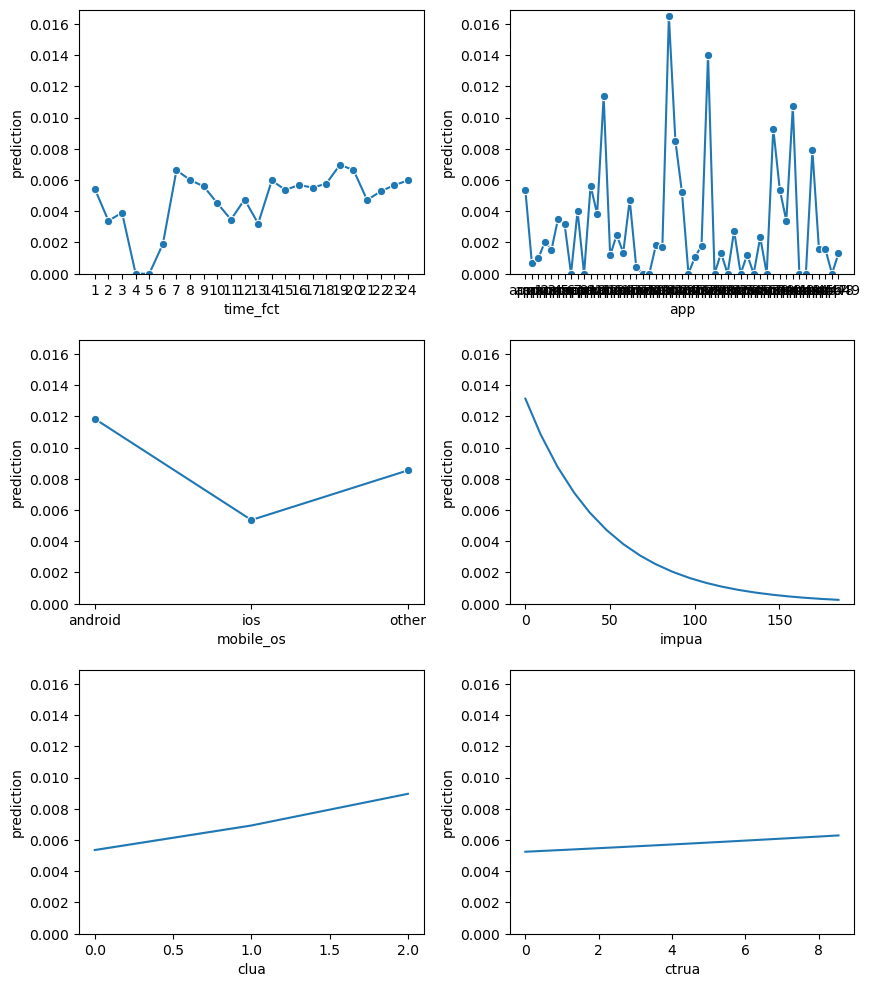

In [7]:
lr.plot(plots = 'pred')

The first graph shows the relationship between click rate and different times of the day. There doesn't seem to be a consistent pattern, indicating that the time of day might not have a strong or linear relationship with the likelihood of clicking.

The second graph shows the relationship between click rate and different apps. The graph shows that the click rate probability is higher for certain apps which could be caused by various factors.

The third graph shows the relationship between click rate and different mobile operating systems. The graph shows that the click rate probability is higher for Andriod users than iOS users and other, indicating that operating system probably have an effect on the click rate.

The fourth graph shows an inverse relationship between the number of times a user has been shown the TZ ad across all apps and the likelihood that they will click on it. As exposure to the ad increases, the likelihood of a click decreases. This trend suggests that users may experience ad fatigue or disinterest when repeatedly exposed to the same ad.

The fifth graph shows a positive relationshop between the variables. The more often a user has clicked on the TZ ad across all apps in the past, the higher the predicted probability they will click on it again. This positive relationship indicates that users who have engaged with the ad previously are more likely to continue interacting with it.

The sixth graph shows a very minimal positive relationship The past click-through rate of the TZ ad across all apps does not appear to have a strong relationship with the predicted probability of clicking. 

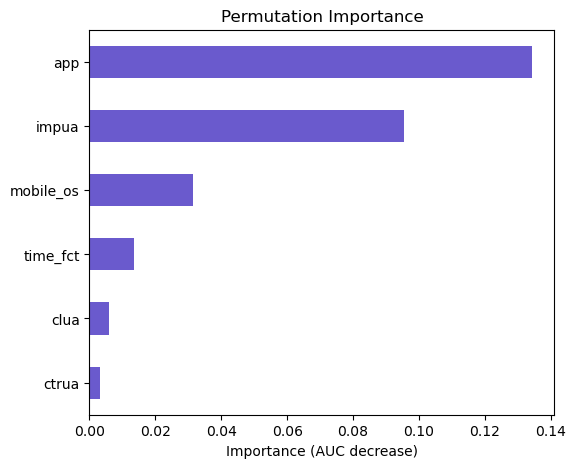

In [8]:
lr.plot(plots='vimp')

The permutation importance graph illustrates that within the predictive model. By shuffling the predictors, permutation importance will tell us how much the AUC would decrease. The more it decreases, more important the variable is. The 'app' variable is the most significant factor influencing click predictions, indicating that the context of the app where ads are displayed is critical. Conversely, 'time_fct', 'clua', and 'ctrua' have relatively lower importance, with the time of the ad impression and the user's past interaction with the ad (through clicks and click-through rate) having a less significant impact on the probability of a user clicking on an ad. 

c. Predict the probability of a click (2 point)

The estimated logistic regression model can predict the probability of a click. Create a new variable `pred_logit` with the predicted click-through probabilities linked to each impression. Make sure to generate predictions for all rows in the training and test data.


In [9]:
pred_logit = lr.predict(tz_gaming)
pred_logit


,time_fct,app,mobile_os,impua,clua,ctrua,prediction
0,9,app8,ios,2,0,0.000000,3.382977e-13
1,15,app1,ios,5,0,0.000000,1.156355e-02
2,12,app5,ios,76,5,6.578947,2.655311e-03
3,19,app1,ios,10,0,0.000000,1.349420e-02
4,24,app1,android,145,1,0.689655,1.868222e-03
...,...,...,...,...,...,...,...
115483,21,app2,ios,12,0,0.000000,1.093091e-03
115484,17,app14,android,27,0,0.000000,3.609483e-03
115485,23,app1,android,46,2,4.347826,2.052670e-02
115486,20,app6,android,2,0,0.000000,2.192207e-02


In [10]:
tz_gaming["pred_logit"] = pred_logit['prediction']
tz_gaming

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,imput,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,25,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,7,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,94,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,19,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,329,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,158,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,74,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,19,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,37,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02


d. Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities (1 point).

In [11]:
lr_rnd = rsm.model.logistic(
    data={"data": train_df},
    rvar='click',      
    evar=['rnd'],
)

lr_rnd.summary()


Logistic regression (GLM)
Data                 : data
Response variable    : click
Level                : None
Explanatory variables: rnd
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.009  -99.1%        -4.72      0.036 -130.657  < .001  ***
rnd        0.965   -3.5%        -0.04      0.036   -0.986   0.324     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): -0.0
Area under the RO Curve (AUC): 0.513
Log-likelihood: -4429.726, AIC: 8863.451, BIC: 8882.211
Chi-squared: 0.972, df(1), p.value 0.324 
Nr obs: 87,535


In [12]:
pred_rnd = lr_rnd.predict(tz_gaming)
tz_gaming["pred_rnd"] = pred_rnd['prediction']

tz_gaming



,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,4,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896


## Part II: Understanding Multicollinearity (10 points)

a. Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)

> Note: Make sure to watch the "Video: TZ gaming preview (12 min)" on Canvas before answering this questions so you fully understand what the variables represent

In [13]:
lr_mc1 = rsm.model.logistic(
    data={"data": train_df},
    rvar='click',    
    evar=['imppat', 'clpat', 'ctrpat'],
)
lr_mc1.summary()

Logistic regression (GLM)
Data                 : data
Response variable    : click
Level                : None
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535


All of the 3 variables have a positive relationship with the click rate. The relationships are also statistically significant as the p-values are all less than 0.001. This indicates that the more often a user has been shown the TZ ad across all apps or the higher the past CTR rate is, the higher the predicted probability they will click on it.However, the past click-through rate of the TZ ad across all apps does not appear to have a relationship with the predicted probability of clicking as the odds ratio is exactly 1.

Adjusted Pseudo R-squared value of 0.035 indicates that the model has limited explanatory power, accounting for only about 4.1% of the variance in the likelihood of an ad being clicked. Despite this, the highly significant Chi-squared statistic of 314.248 with 3 degrees of freedom (df) and a p-value less than 0.001 suggests that the model, with its explanatory variables, does significantly better at predicting clicks than a null model that assumes no relationship between the variables and the outcome.

b. Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a strong positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a (4 points).

In [14]:
lr_mc1.summary(vif=True)

Logistic regression (GLM)
Data                 : data
Response variable    : click
Level                : None
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

           vif    Rsq
clpat   26.242  0.962
imppat  23.467  0.957
ctrpat

Here the vif score for the variable 'clpat' and 'imppat' is 26 and 23 which are very high, indicating that the two variables are highly correlated. This is a problem because it can lead to unstable estimates of regression coefficients, which makes it very difficult to assess the effect of independent variables on the dependent variable. 

There are multiple ways to deal with issue. The easiest would just be to remove one of the variables from the model. Another way would be to combine the two variables into one. This would mean that we would lose some information but it would be less than if we just removed one of the variables. We can also do feature engineering to create new variables that are not correlated with each other transforming or aggregating existing variables in a meaningful way.

> Note: Assign your new model without `clpat` to a new object `lr_mc2`. Calculate VIF statistics for each explanatory variable in the model


In [15]:
lr_mc2 = rsm.model.logistic(
    data={"data": train_df},
    rvar='click',      
    evar=['imppat', 'ctrpat'],
)


In [16]:
lr_mc2.summary(vif=True)

Logistic regression (GLM)
Data                 : data
Response variable    : click
Level                : None
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535

Variance inflation factors:

          vif    Rsq
imppat  1.134  0.118
ctrpat  1.134  0.118


By removing the variable 'clpat', the vif values for both variables are now 1.134 which are very close to 1 indicating that there is almost no correlation between the two variables and multicollinearity no longer exists.

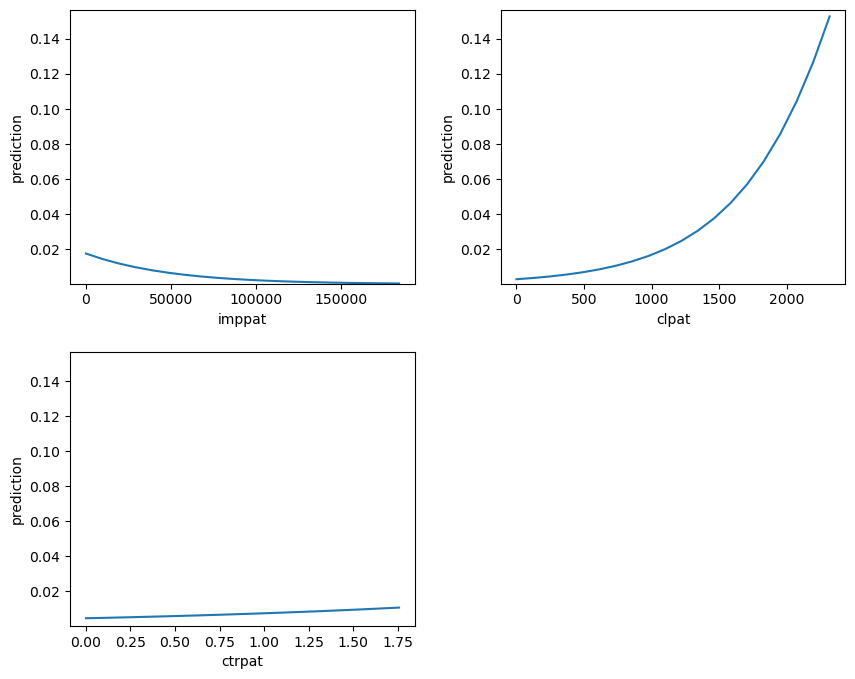

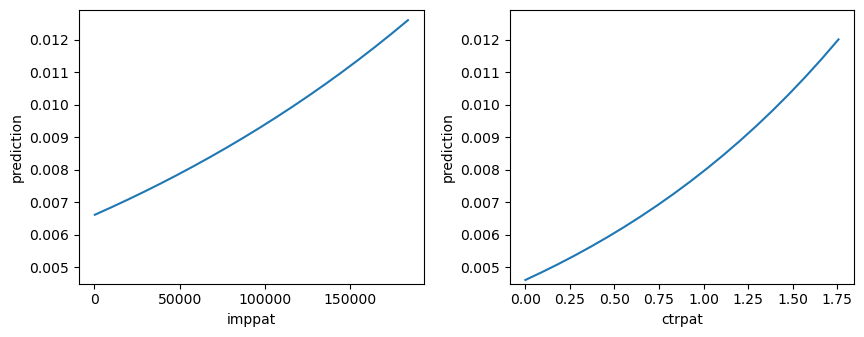

In [17]:
lr_mc1.plot(plots = 'pred')
lr_mc2.plot(plots = 'pred')

The first plot shows a flat relationship between predicted probability and 'imppat' and 'ctrpat'. This indicates that these two variables do not have much impact on the predicted probability of clicking. The second plot shows a much stronger positive relationship between predicted probability and 'ctrpat'. This indicates that the more often a user has clicked on the TZ ad across all apps in the past, the higher the predicted probability they will click on it again.

c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem (4 points).


In [18]:
lr_mc3 = rsm.model.logistic(
    data={"data": train_df},
    rvar='click',      
    evar=['time_fct', 'app', 'imppat', 'clpat', 'ctrpat'],
)


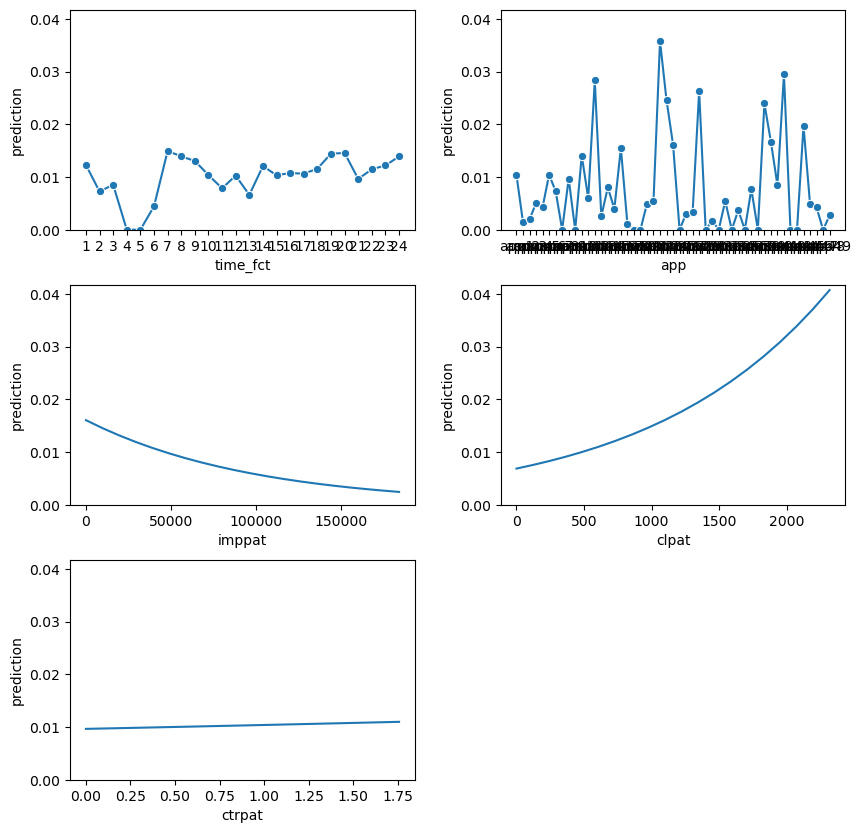

In [19]:
lr_mc3.plot(plots = 'pred')

The reason why the prediction plots for 'imppat', 'clpat', and 'ctrpat' are different compared to the plots from the model estimated in II.a is because two additional variables 'time_fct' and 'app' are added to the model. The addition of these two variables has changed the relationship between the explanatory variables and the response variable. The additional variables may change the importance of the variables, interact with the existing variables, change the model complexity etc. All of which will change the relationship between the explanatory variables and the response variable and thus produce different prediction plots.

## Part III: Decile Analysis of Logistic Regression Results (5 points)

> Note: For the following questions, use only the "test" sample of impressions (i.e., 27,953 rows
where "training == 'test'")

a. Assign each impression to a decile based on the predicted probability of click through (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click-through rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles (2 points)

In [20]:
test_df = tz_gaming[tz_gaming['training'] == 'test']

In [21]:
tz_gaming["pred_logit_dec"] = (tz_gaming
                               .groupby('training')
                               .pred_logit
                               .transform(rsm.xtile, 10, rev=True)
)


b. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per decile and save this information to a DataFrame. Use the name `dec_tab` for the new data frame (2 points)

In [22]:
tz_gaming['click_binary'] = np.where(tz_gaming['click'] == 'yes', 1, 0)


In [23]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)
dec_tab = tz_gaming[tz_gaming['training'] == 'test'].groupby('pred_logit_dec').agg(
    nr_impressions=('pred_logit', 'count'),
    nr_click=('click_binary', 'sum'),
    ctr=('click_binary', 'mean')
).reset_index()

In [24]:
dec_tab

,pred_logit_dec,nr_impressions,nr_click,ctr
0,1,2796,103,0.036838
1,2,2793,48,0.017186
2,3,2788,42,0.015065
3,4,2796,30,0.010730
4,5,2802,15,0.005353
5,6,2796,7,0.002504
6,7,2794,7,0.002505
7,8,2796,3,0.001073
8,9,2796,4,0.001431
9,10,2796,12,0.004292


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click (1 point)


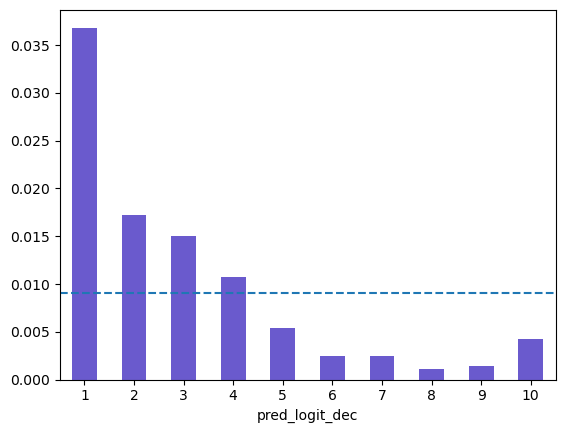

In [25]:
fig = dec_tab.plot.bar(
    x="pred_logit_dec", y="ctr", rot=0, color="slateblue", legend=None
)
fig.axhline(y=tz_gaming['click_binary'].mean(), linestyle="--")

## Part IV: Lift, Gains, and Profit (15 points)

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile (8 points)

> Note: Do NOT use any specialized python packages to construct the gains table. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [26]:
gains_tab = dec_tab

In [27]:
gains_tab

,pred_logit_dec,nr_impressions,nr_click,ctr
0,1,2796,103,0.036838
1,2,2793,48,0.017186
2,3,2788,42,0.015065
3,4,2796,30,0.010730
4,5,2802,15,0.005353
5,6,2796,7,0.002504
6,7,2794,7,0.002505
7,8,2796,3,0.001073
8,9,2796,4,0.001431
9,10,2796,12,0.004292


In [28]:
gains_tab['cum_nobs'] = gains_tab['nr_impressions'].cumsum()
gains_tab['cum_clicks'] = gains_tab['nr_click'].cumsum()

total_nobs = gains_tab['nr_impressions'].sum()
total_clicks = gains_tab['nr_click'].sum()

gains_tab['cum_prop_nobs'] = gains_tab['cum_nobs'] / total_nobs
gains_tab['cum_prop_clicks'] = gains_tab['cum_clicks'] / total_clicks

gains_tab 

,pred_logit_dec,nr_impressions,nr_click,ctr,cum_nobs,cum_clicks,cum_prop_nobs,cum_prop_clicks
0,1,2796,103,0.036838,2796,103,0.100025,0.380074
1,2,2793,48,0.017186,5589,151,0.199943,0.557196
2,3,2788,42,0.015065,8377,193,0.299682,0.712177
3,4,2796,30,0.010730,11173,223,0.399707,0.822878
4,5,2802,15,0.005353,13975,238,0.499946,0.878229
5,6,2796,7,0.002504,16771,245,0.599971,0.904059
6,7,2794,7,0.002505,19565,252,0.699925,0.929889
7,8,2796,3,0.001073,22361,255,0.799950,0.940959
8,9,2796,4,0.001431,25157,259,0.899975,0.955720
9,10,2796,12,0.004292,27953,271,1.000000,1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (7 points)

> Note: Do NOT use any specialized packages to construct the gains chart. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

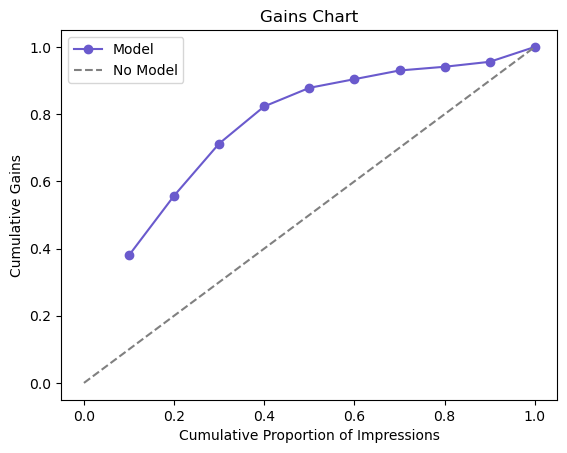

In [29]:
plt.plot(gains_tab['cum_prop_nobs'], gains_tab['cum_prop_clicks'], marker='o', color='slateblue', label='Model')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='No Model')

plt.xlabel('Cumulative Proportion of Impressions')
plt.ylabel('Cumulative Gains')
plt.title('Gains Chart')
plt.legend()

plt.show()

## Part V: Confusion matrix (10 points)

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Code the matrix from scratch.  Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

> Note use the code format below to store the relevant values from your confusion matrix

In [30]:
test_df = tz_gaming[tz_gaming['training'] == 'test']
test_df

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,click_binary
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,68113,957,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791,4,0
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,50,0,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718,4,0
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,754,8,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448,10,0
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,26537,276,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630,5,0
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,57348,874,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,8,0
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,6,0
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,2,0
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,1,0


In [31]:
num_obs = test_df.shape[0]
cost = num_obs * 10/1000
margin = num_obs * 0.05 * 25

cutoff = cost/margin
cutoff

0.007999999999999998

In [32]:
TP = ((test_df['click_binary'] == 1) & (test_df['pred_logit'] >= cutoff)).sum()
TN = ((test_df['click_binary'] == 0) & (test_df['pred_logit'] < cutoff)).sum()
FP = ((test_df['click_binary'] == 0) & (test_df['pred_logit'] >= cutoff)).sum()
FN = ((test_df['click_binary'] == 1) & (test_df['pred_logit'] < cutoff)).sum()


In [33]:
cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)
cm_logit

,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


In [34]:
accuracy_logit = (TP + TN) / (TP + TN + FP + FN)
accuracy_logit


0.6168210925482059

b. Calculate a DataFrame with elements from a confusion matrix based on `pred_rnd` created in Part I and calculate `accuracy` based on the confusion matrix you created (2 points)

In [35]:
TP = ((test_df['click_binary'] == 1) & (test_df['pred_rnd'] >= cutoff)).sum()
TN = ((test_df['click_binary'] == 0) & (test_df['pred_rnd'] < cutoff)).sum()
FP = ((test_df['click_binary'] == 0) & (test_df['pred_rnd'] >= cutoff)).sum()
FN = ((test_df['click_binary'] == 1) & (test_df['pred_rnd'] < cutoff)).sum()

> Note use the code format below to store the relevant values from your confusion matrix

In [60]:
cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)
cm_rnd

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [37]:
accuracy_rnd = (TP + TN) / (TP + TN + FP + FN)
accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

Both matrices have a lot of false positives indicating that the model is not very ideal and need to be improved. The first model is a bit more conservative, predicting some correct predictions without too many costly mistakes. The second model goes all in, catching almost every positive case but at a high cost due to a lot of false alarms. If we're watching our budget and false positives are expensive, we'd likely pick the first model for being more cost-effective.

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices, again discuss the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

> Note use the code format below to store the relevant values from your confusion matrix

In [38]:
TP = ((test_df['click_binary'] == 1) & (test_df['pred_logit'] >= 0.5)).sum()
TN = ((test_df['click_binary'] == 0) & (test_df['pred_logit'] < 0.5)).sum()
FP = ((test_df['click_binary'] == 0) & (test_df['pred_logit'] >= 0.5)).sum()
FN = ((test_df['click_binary'] == 1) & (test_df['pred_logit'] < 0.5)).sum()

In [39]:
cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)
cm_logit

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [40]:
accuracy_logit_recalc = (TP + TN) / (TP + TN + FP + FN)
accuracy_logit_recalc

0.9903051550817443

> Note use the code format below to store the relevant values from your confusion matrix

In [41]:
TP = ((test_df['click_binary'] == 1) & (test_df['pred_rnd'] >= 0.5)).sum()
TN = ((test_df['click_binary'] == 0) & (test_df['pred_rnd'] < 0.5)).sum()
FP = ((test_df['click_binary'] == 0) & (test_df['pred_rnd'] >= 0.5)).sum()
FN = ((test_df['click_binary'] == 1) & (test_df['pred_rnd'] < 0.5)).sum()

In [61]:
cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)
cm_rnd

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [43]:
accuracy_rnd_recalc = (TP + TN) / (TP + TN + FP + FN)
accuracy_rnd_recalc

0.9903051550817443

Now the two matrices are exactly the same. Both confusion matrices show that the model predicted no clicks at all, missing out on all actual clicks (271 False Negatives) and avoiding any false alarms (zero False Positives). This kind of model is too cautious and isn't helpful if the goal is to actually identify potential clicks since it flags everything as a non-click. This is a problem because it means that the model is not very useful in predicting clicks.

## Part VI: Model comparison (12 points)


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming advertising campaign where TZ will purchase 20-million impressions from Vneta:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.

> Note: The currently available data (+ the `pred_vneta` prediction) are free as part of the partnership between Vneta and TZ-gaming

a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [44]:
tz_gaming["target_logit"] = tz_gaming['pred_logit'] > cutoff

b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [45]:
tz_gaming["target_rnd"] = tz_gaming['pred_rnd'] > cutoff

c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [46]:
# insert your answer here
tz_gaming["target_vneta"] = tz_gaming['pred_vneta'] > cutoff

In [47]:
test_df = tz_gaming[tz_gaming['training'] == 'test']


d. Based only on the test set (i.e, `training == "test"`), calculate the expected profit (in dollars) and the expected return on marketing expenditures (ROME) if TZ (1) `spams` everyone in the test set, (2) continues to target using their current approach (`pred_rnd`), (3) purchases the data from Vneta and uses the logistic regression from I (`pred_logit`) for targeting, or (4) used Vneta's data science consulting services (`pred_vneta`) (3 points)

> Note: For efficiency, you can adapt the `perf_calc_actual` function you created for the Tuango case to do the relevant performance calculations for the different models

In [48]:
test_df = tz_gaming[tz_gaming['training'] == 'test']
test_df


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec,click_binary,target_logit,target_rnd,target_vneta
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,0.147891,0.003961,id466983,1.020981e-02,0.008791,4,0,True,True,False
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0.383246,0.018965,id946375,8.665095e-03,0.008718,4,0,True,True,True
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,1.274485,0.003961,id479295,1.910723e-14,0.008448,10,0,False,True,False
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,0.673022,0.003961,id83284,6.240407e-03,0.008630,5,0,False,True,False
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,-0.785851,0.050679,id359434,1.233449e-02,0.009086,3,0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,-1.852059,0.003961,id847352,1.093091e-03,0.009435,8,0,False,True,False
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,-0.296415,0.003961,id457437,3.609483e-03,0.008930,6,0,False,True,False
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0.099201,0.003961,id792352,2.052670e-02,0.008806,2,0,True,True,False
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,-0.186421,0.050679,id115678,2.192207e-02,0.008896,1,0,True,True,True


In [49]:
num_total = test_df.shape[0]
cost_total = num_total * 10/1000
selected_rows = test_df[test_df['click'] == 'yes']
yes_all = selected_rows.shape[0]
rev_total = yes_all * 0.05 * 25
profit_total = rev_total - cost_total
ROME_total = profit_total / cost_total

display(profit_total, ROME_total)

59.22000000000003

0.21185561478195555

In [50]:
num_target_rnd = test_df['target_rnd'].sum()
cost_rnd = num_target_rnd * 10/1000
selected_rows = test_df[(test_df['target_rnd'] == True) & (test_df['click'] == 'yes')]
yes_rnd = selected_rows.shape[0]
rev_rnd = yes_rnd * 0.05 * 25
profit_rnd = rev_rnd - cost_rnd
ROME_rnd = profit_rnd / cost_rnd
display(profit_rnd, ROME_rnd)

59.98000000000002

0.21515945044301762

In [51]:
num_logit = test_df['target_logit'].sum()
cost_logit = num_logit * 10/1000
selected_rows = test_df[(test_df['target_logit'] == True) & (test_df['click'] == 'yes')]
yes_logit = selected_rows.shape[0]
rev_logit = yes_logit * 0.05 * 25
profit_logit = rev_logit - cost_logit
ROME_logit = profit_logit / cost_logit

display(profit_logit, ROME_logit)


167.43

1.5385958463517737

In [52]:
num_vneta = test_df['target_vneta'].sum()
cost_vneta = num_vneta * 10/1000
selected_rows = test_df[(test_df['target_vneta'] == True) & (test_df['click'] == 'yes')]
yes_vneta = selected_rows.shape[0]
rev_vneta = yes_vneta * 0.05 * 25
profit_vneta = rev_vneta - cost_vneta
ROME_vneta = profit_vneta / cost_vneta
display(profit_vneta, ROME_vneta)

151.29

3.105933073290905

In [53]:
# calculate and add profit and ROME values for each approach
# to the mod_perf data frame
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit_total],
        "ROME": [ROME_logit, ROME_rnd, ROME_vneta, ROME_total],
    }
)

mod_perf

,model,profit,ROME
0,logit,167.43,1.538596
1,rnd,59.98,0.215159
2,vneta,151.29,3.105933
3,spam,59.22,0.211856


e. Based on the results from VI.d discuss which of these 4 approaches you would recommend and why (2 points)

Here, the best approach is to continue to target using their current approach as it will give us a slightly higher profit and ROME compare to the spamming approach. Getting the data from Vneta or hiring the data science consulting team will give us a higher raw profit and ROME but the data will cost $50K and the consulting team will cost $150K. After deducting the cost for either approach, the profit will be negative. Thus, the best approach is to continue to target using their current approach. 

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases 20-million impression for the upcoming ad campaign (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, you can adapt the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

In [54]:
total_impression = 20000000
total_cost = total_impression * 10/1000

In [55]:
spam_perc = yes_all / num_total
spam_yes = spam_perc * total_impression
spam_profit = spam_yes * 0.05 * 25 - total_cost
spam_rome = spam_profit / total_cost

display(spam_profit, spam_rome)

42371.122956391075

0.2118556147819554

In [56]:
rnd_total = total_impression * num_target_rnd / num_total
rnd_cost = rnd_total * 10/1000
rnd_perc = yes_rnd / num_target_rnd
rnd_yes = rnd_perc * rnd_total
rnd_profit = rnd_yes * 0.05 * 25 - rnd_cost
rnd_rome = rnd_profit / rnd_cost

display(rnd_profit, rnd_rome)


42914.89285586518

0.21515945044301743

In [57]:
logit_total = total_impression * num_logit / num_total
logit_cost = logit_total * 10/1000
logit_perc = yes_logit / num_logit
logit_yes = logit_perc * logit_total
logit_profit = logit_yes * 0.05 * 25 - logit_cost
logit_rome = logit_profit / logit_cost

display(logit_profit, logit_rome)

119793.93982756774

1.5385958463517742

In [58]:
vneta_total = total_impression * num_vneta / num_total
vneta_cost = vneta_total * 10/1000
vneta_perc = yes_vneta / num_vneta
vneta_yes = vneta_perc * vneta_total
vneta_profit = vneta_yes * 0.05 * 25 - vneta_cost
vneta_rome = vneta_profit / vneta_cost

display(vneta_profit, vneta_rome)

108245.98433084103

3.1059330732909047

In [59]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [logit_profit, rnd_profit, vneta_profit, spam_profit],
        "ROME": [logit_rome, rnd_rome, vneta_rome, spam_rome],
    }
)

mod_perf_20M

,model,profit,ROME
0,logit,119793.939828,1.538596
1,rnd,42914.892856,0.215159
2,vneta,108245.984331,3.105933
3,spam,42371.122956,0.211856


g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, consider adapting the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

Here, the best approach is to get the data from Vneta and use the logistic regression from I for targeting. This is because it will give us the highest profit. The data will cost $50K but the after deducting the cost, this approach will still give us a profit of $69794 which is the highest among the 4 options. The data science consulting team will give us the highest ROME but hiring them is too costly and after deducting the cost, the profit will be negative. Thus, the best approach is to get the data from Vneta.